In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [19]:
agegrp=pd.read_csv('AgeGroupDetails.csv')
covidindia=pd.read_csv('covid_19_india.csv')
hospitalbeds=pd.read_csv('HospitalBedsIndia.csv')
individualdetails=pd.read_csv('IndividualDetails.csv')

In [20]:
agegrp.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [21]:
agegrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


In [23]:
agegrp.describe()

,Sno,TotalCases
count,10.00000,10.000000
mean,5.50000,69.200000
std,3.02765,59.241127
min,1.00000,9.000000
25%,3.25000,23.250000
50%,5.50000,52.500000
75%,7.75000,106.250000
max,10.00000,172.000000


In [24]:
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [25]:
covidindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
Sno                         801 non-null float64
Date                        801 non-null object
Time                        801 non-null object
State/UnionTerritory        801 non-null object
ConfirmedIndianNational     801 non-null object
ConfirmedForeignNational    801 non-null object
Cured                       801 non-null float64
Deaths                      801 non-null float64
Confirmed                   801 non-null float64
dtypes: float64(4), object(5)
memory usage: 56.8+ KB


In [26]:
hospitalbeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [28]:
hospitalbeds=hospitalbeds[:-2]
hospitalbeds.fillna(0,inplace=True)
hospitalbeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0,0.0,0.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,0.0,0.0
2,3.0,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0,0.0,0.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,0.0,0.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,0.0,0.0


In [29]:
hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
Sno                                 34 non-null float64
State/UT                            34 non-null object
NumPrimaryHealthCenters_HMIS        34 non-null object
NumCommunityHealthCenters_HMIS      34 non-null object
NumSubDistrictHospitals_HMIS        34 non-null object
NumDistrictHospitals_HMIS           34 non-null object
TotalPublicHealthFacilities_HMIS    34 non-null object
NumPublicBeds_HMIS                  34 non-null object
NumRuralHospitals_NHP18             34 non-null float64
NumRuralBeds_NHP18                  34 non-null float64
NumUrbanHospitals_NHP18             34 non-null float64
NumUrbanBeds_NHP18                  34 non-null float64
Unnamed: 12                         34 non-null float64
Unnamed: 13                         34 non-null float64
dtypes: float64(7), object(7)
memory usage: 3.8+ KB


In [30]:
for col in hospitalbeds.columns[2:]:
    if hospitalbeds[col].dtype=='object':
        hospitalbeds[col]=hospitalbeds[col].astype('int64')

In [31]:
covidindia['Date']=pd.to_datetime(covidindia['Date'])

# Finding missing values

In [36]:
agegrp.isnull().sum()

Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64

In [37]:
covidindia.isnull().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     5
ConfirmedForeignNational    5
Cured                       5
Deaths                      5
Confirmed                   5
dtype: int64

In [38]:
hospitalbeds.isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
Unnamed: 12                         0
Unnamed: 13                         0
dtype: int64

In [41]:
individualdetails.isnull().sum()

id                       0
government_id         5513
diagnosed_date           0
age                   5747
gender                5149
detected_city         5899
detected_district     1349
detected_state           0
nationality           5647
current_status           1
status_change_date     110
notes                 1190
dtype: int64

# Visualizations

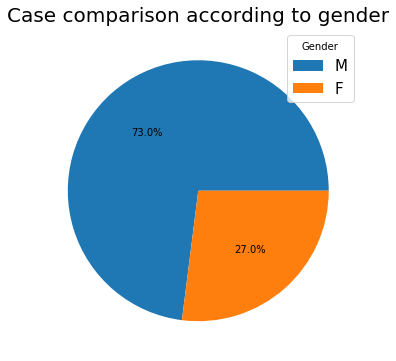

In [32]:
gender=individualdetails.gender
gender.dropna(inplace=True)
gender=gender.value_counts()
per=[]
for i in gender:
    perc=i/gender.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))    
plt.title('Case comparison according to gender',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(gender.index,loc='best',title='Gender',fontsize=15)

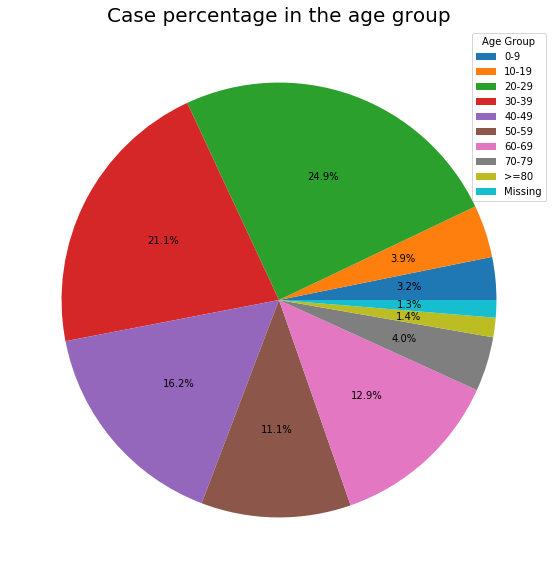

In [33]:
perc=[]
for i in agegrp['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    perc.append(per)
agegrp['Percentage']=perc
plt.figure(figsize=(20,10))
plt.title('Case percentage in the age group',fontsize=20)
plt.pie(agegrp['Percentage'],autopct='%1.1f%%')
plt.legend(agegrp['AgeGroup'],loc='best',title='Age Group')

<BarContainer object of 20 artists>

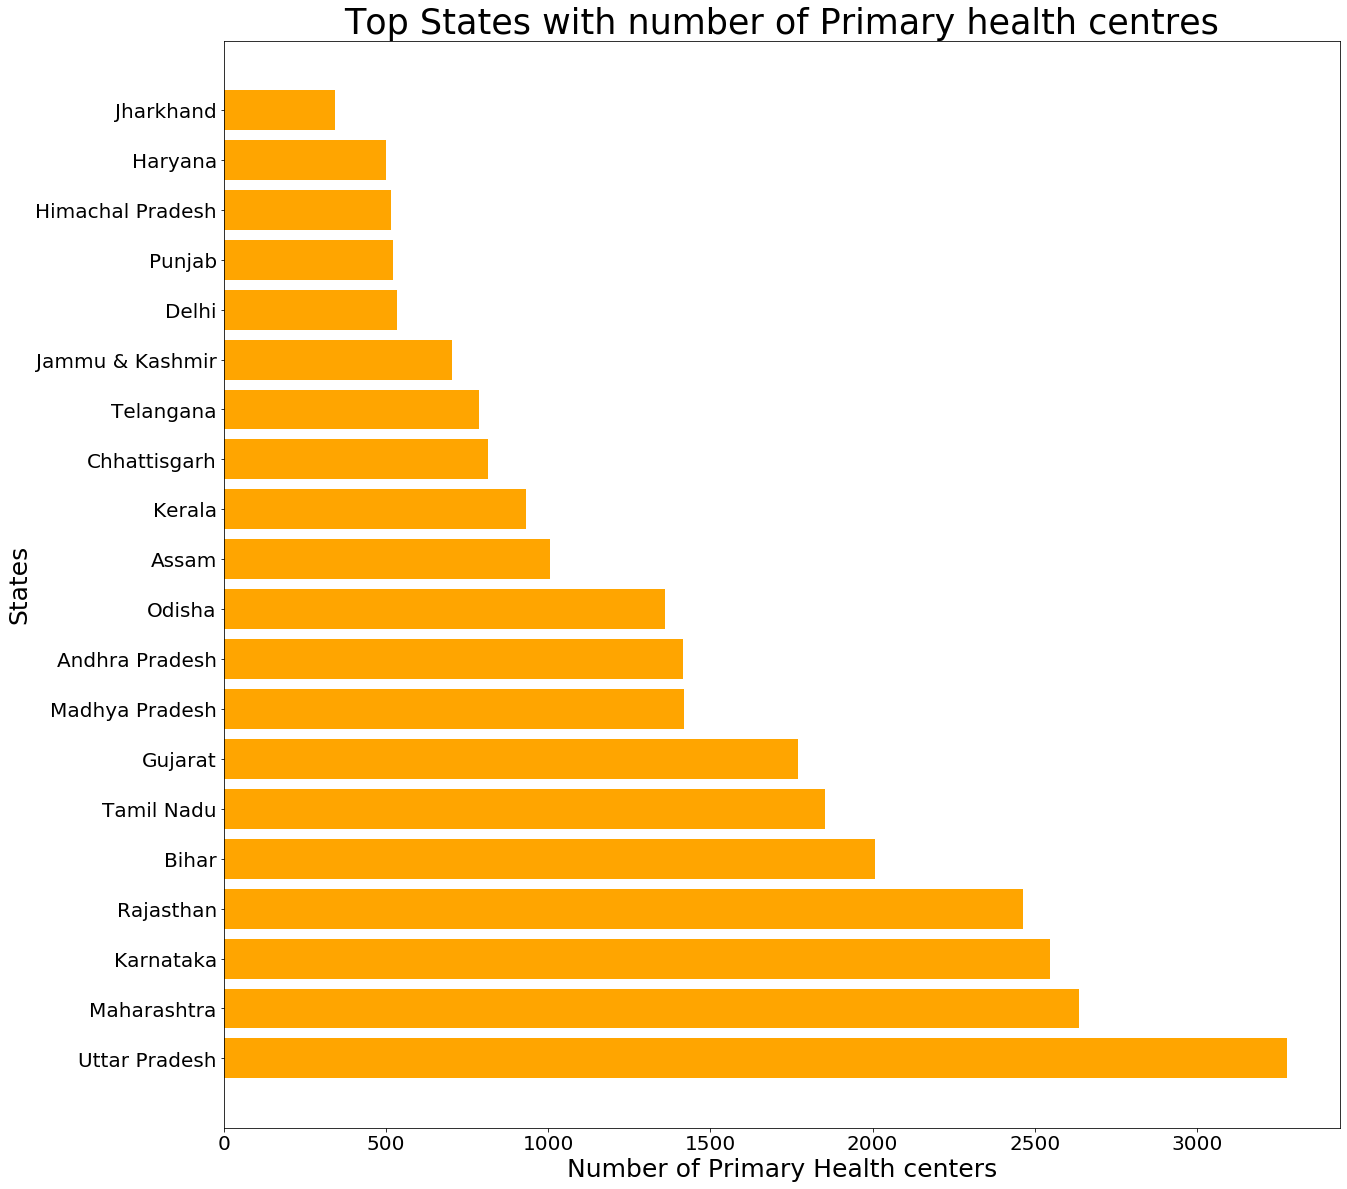

In [35]:
top=hospitalbeds.nlargest(20,'NumPrimaryHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top States with number of Primary health centres',fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Primary Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumPrimaryHealthCenters_HMIS'],color='orange',linewidth=1)

In [63]:
covidindia.isnull().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       5
Deaths                      5
Confirmed                   5
date                        5
month                       5
dtype: int64

In [64]:
covidindia["ConfirmedForeignNational"]=covidindia['ConfirmedForeignNational'].replace('-',0,inplace=True)
covidindia["ConfirmedIndianNational"]=covidindia['ConfirmedIndianNational'].replace('-',0,inplace=True)

In [65]:
covidindia.isnull().sum()

Sno                           5
Date                          5
Time                          5
State/UnionTerritory          5
ConfirmedIndianNational     806
ConfirmedForeignNational    806
Cured                         5
Deaths                        5
Confirmed                     5
date                          5
month                         5
dtype: int64

In [66]:
covidindia['ConfirmedIndianNational']=covidindia['ConfirmedIndianNational'].astype('float64')
covidindia['ConfirmedForeignNational']=covidindia['ConfirmedForeignNational'].astype('float64')

# Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
covidindia['State/UnionTerritory']=lbl.fit_transform(covidindia['State/UnionTerritory'])

TypeError: argument must be a string or number